In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_body_parts(image_path):
 
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    head_lower = np.array([20, 40, 50]) 
    head_upper = np.array([45, 150, 200])  
    
    flippers_lower = np.array([20, 30, 40]) 
    flippers_upper = np.array([ 45, 140,  180])  
    
    carapace_lower = np.array([20, 50, 30])  
    carapace_upper = np.array([40, 180, 150])  

    # Segment each part using inRange to create masks
    head_mask = cv2.inRange(hsv, head_lower, head_upper)
    flippers_mask = cv2.inRange(hsv, flippers_lower, flippers_upper)
    carapace_mask = cv2.inRange(hsv, carapace_lower, carapace_upper)

    # Apply morphological operations to clean up the masks
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    head_mask = cv2.morphologyEx(head_mask, cv2.MORPH_CLOSE, kernel)
    flippers_mask = cv2.morphologyEx(flippers_mask, cv2.MORPH_CLOSE, kernel)
    carapace_mask = cv2.morphologyEx(carapace_mask, cv2.MORPH_CLOSE, kernel)

    # Find contours for each body part
    def extract_contours(mask):
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        return contours

    head_contours = extract_contours(head_mask)
    flippers_contours = extract_contours(flippers_mask)
    carapace_contours = extract_contours(carapace_mask)

    # Draw the contours on the original image for visualization
    result_image = image.copy()
    cv2.drawContours(result_image, head_contours, -1, (255, 0, 0), 2)  # Blue for head
    cv2.drawContours(result_image, flippers_contours, -1, (0, 255, 0), 2)  # Green for flippers
    cv2.drawContours(result_image, carapace_contours, -1, (0, 0, 255), 2)  # Red for carapace

    # Display the results
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.subplot(2, 2, 2)
    plt.title("Head Mask")
    plt.imshow(head_mask, cmap="gray")
    plt.subplot(2, 2, 3)
    plt.title("Flippers Mask")
    plt.imshow(flippers_mask, cmap="gray")
    plt.subplot(2, 2, 4)
    plt.title("Carapace Mask")
    plt.imshow(carapace_mask, cmap="gray")
    plt.figure()
    plt.title("Segmented Parts on Original Image")
    plt.imshow(result_image)
    plt.show()





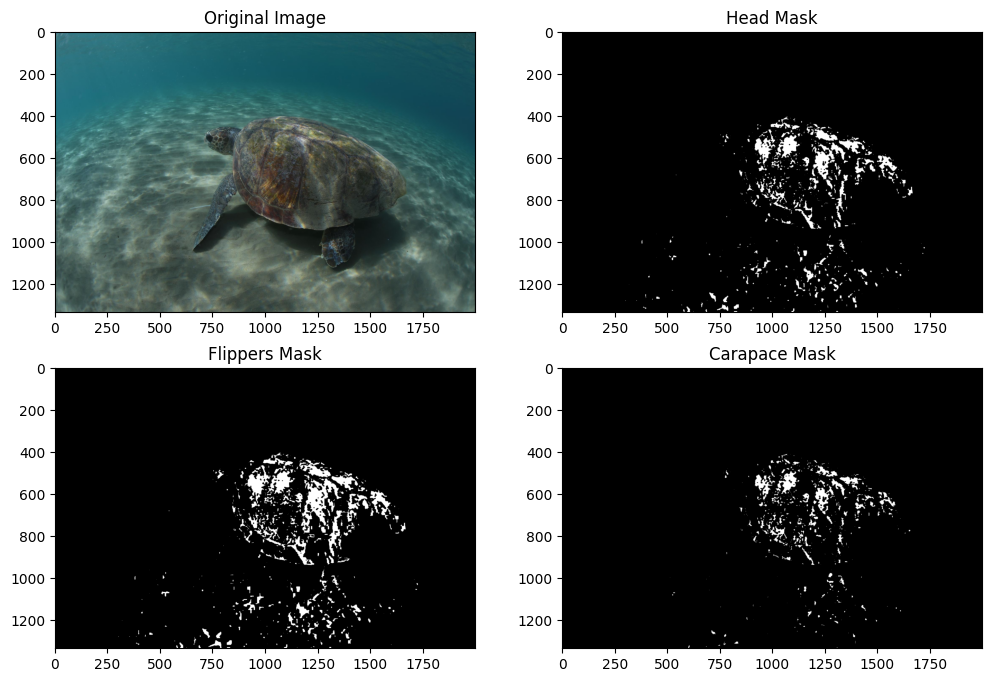

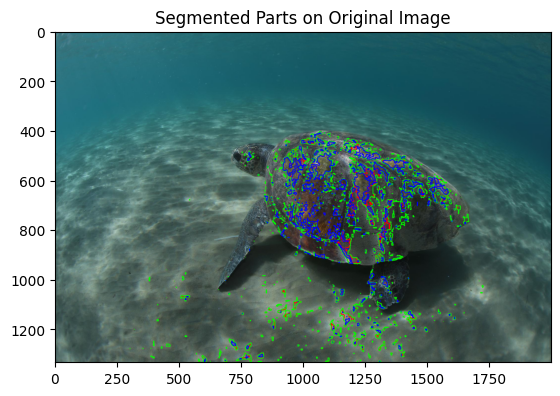

In [6]:
segment_body_parts("turtles-data/data/images/t553/GhVLSdjicv.jpeg")